# Machine Learning Lab 3

## Loading the Iris Dataset


In [14]:
from scipy.io import arff
import pandas as pd

# load the iris.arff data set
data = arff.loadarff('sample_data/iris.arff')
iris_df = pd.DataFrame(data[0])
iris_df['class'] = iris_df['class'].str.decode('utf-8') # fixes byte strings, avoiding strings like b'Iris-versicolor'

# print the top of the file (just to check it's read and processed OK)
iris_df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Dataset information / basic stats

In [15]:
print("\nGeneral info\n")
print(iris_df.info())

print("\nStatistics (of numeric features)\n")
print(iris_df.describe())

print("\nInfo about the class\n")
print(iris_df['class'].describe(),"\n")
print(iris_df['class'].value_counts())



General info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Statistics (of numeric features)

       sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    

## Basic Plotting

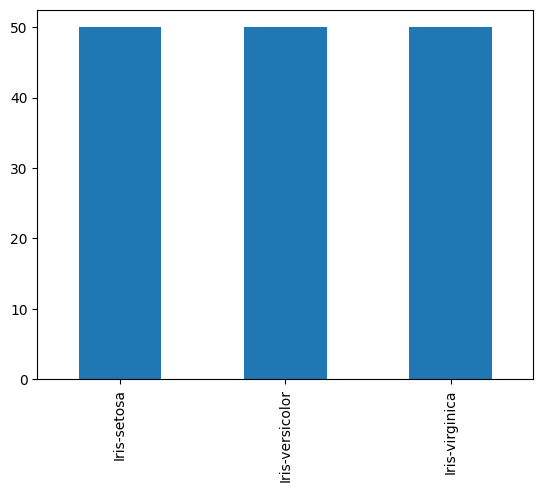

In [16]:
# task 1.3.1
import matplotlib.pyplot as plt

plt.figure();
iris_df['class'].value_counts().plot(kind="bar");

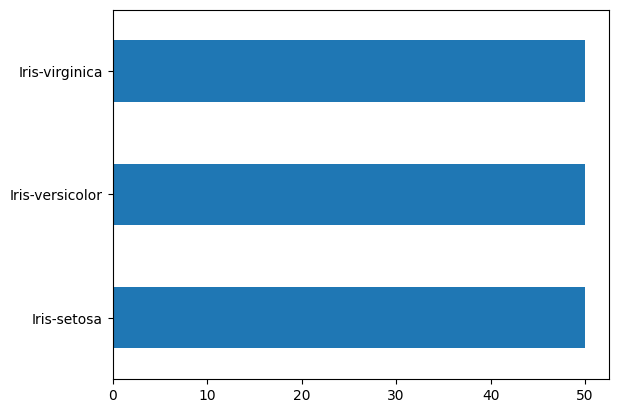

In [17]:
# task 1.3.2
import matplotlib.pyplot as plt

plt.figure();
iris_df['class'].value_counts().plot(kind="barh");

In [ ]:
# Task 1.3.3


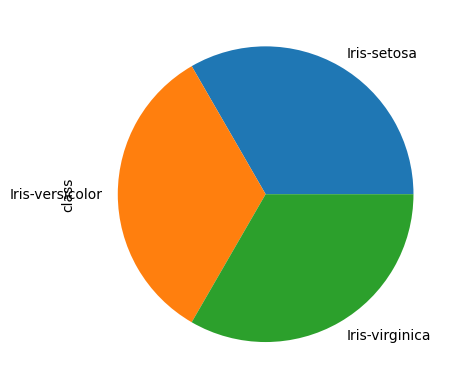

In [18]:
# Task 1.3.3
import matplotlib.pyplot as plt

plt.figure();
iris_df['class'].value_counts().plot(kind="pie");

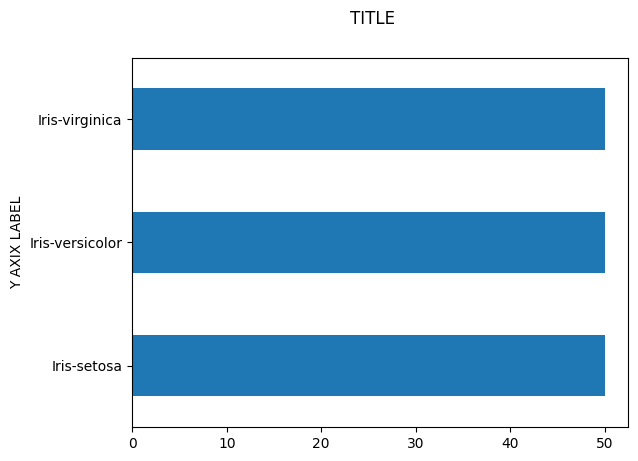

In [20]:
# Task 1.3.4 - the matplotlib way
import matplotlib.pyplot as plt

plt.figure()  # an empty figure with no axes
plt.suptitle('TITLE')  # add a title
plt.xlabel('X AXIX LABEL')
plt.ylabel('Y AXIX LABEL')

# code to plot, like you did above, e.g.,
iris_df['class'].value_counts().plot(kind="barh");

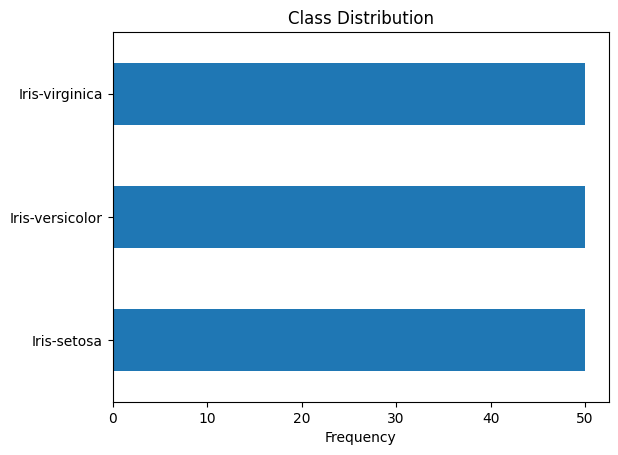

In [21]:
# Task 1.3.4 - pandas plot
import matplotlib.pyplot as plt

plt.figure()  # an empty figure with no axes
iris_df['class'].value_counts().plot(kind="barh", title='Class Distribution', xlabel='Frequency');



## Visualising feature data

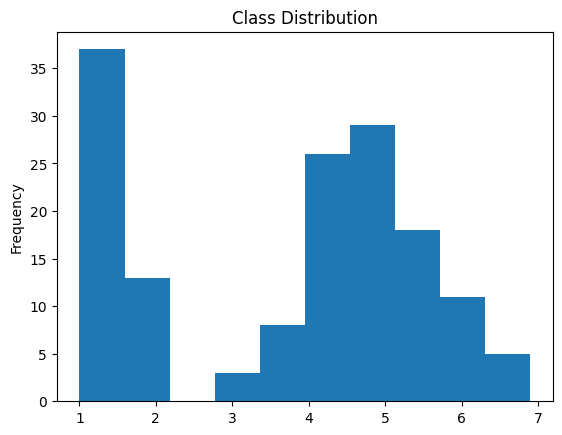

In [22]:
# Task 1.4.1
iris_df['petallength'].plot(kind='hist', title='Class Distribution');

<Axes: title={'center': 'Class Distribution'}, ylabel='Frequency'>

<Figure size 640x480 with 0 Axes>

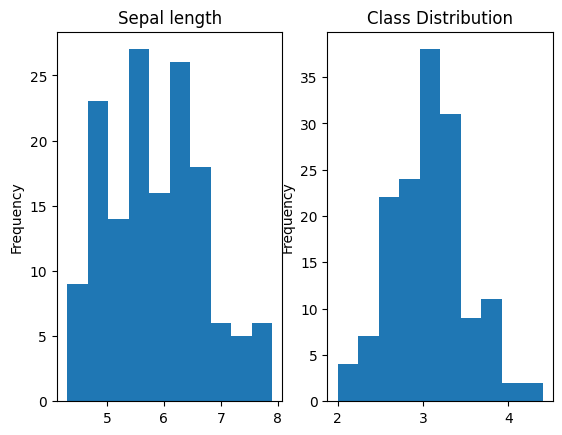

In [23]:
# Task 1.4.2
fig = plt.figure();

# Setting up figure with two sub-plots
fig, axs = plt.subplots(nrows=1, ncols=2)

iris_df['sepallength'].plot(ax=axs[0], kind='hist', title='Sepal length');
iris_df['sepalwidth'].plot(kind='hist', title='Class Distribution')

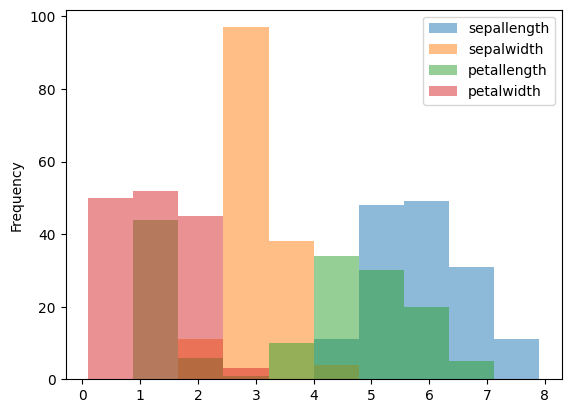

In [ ]:
# Task 1.4.3 - a histogram for all features
iris_df.plot(kind='hist', alpha=0.5);

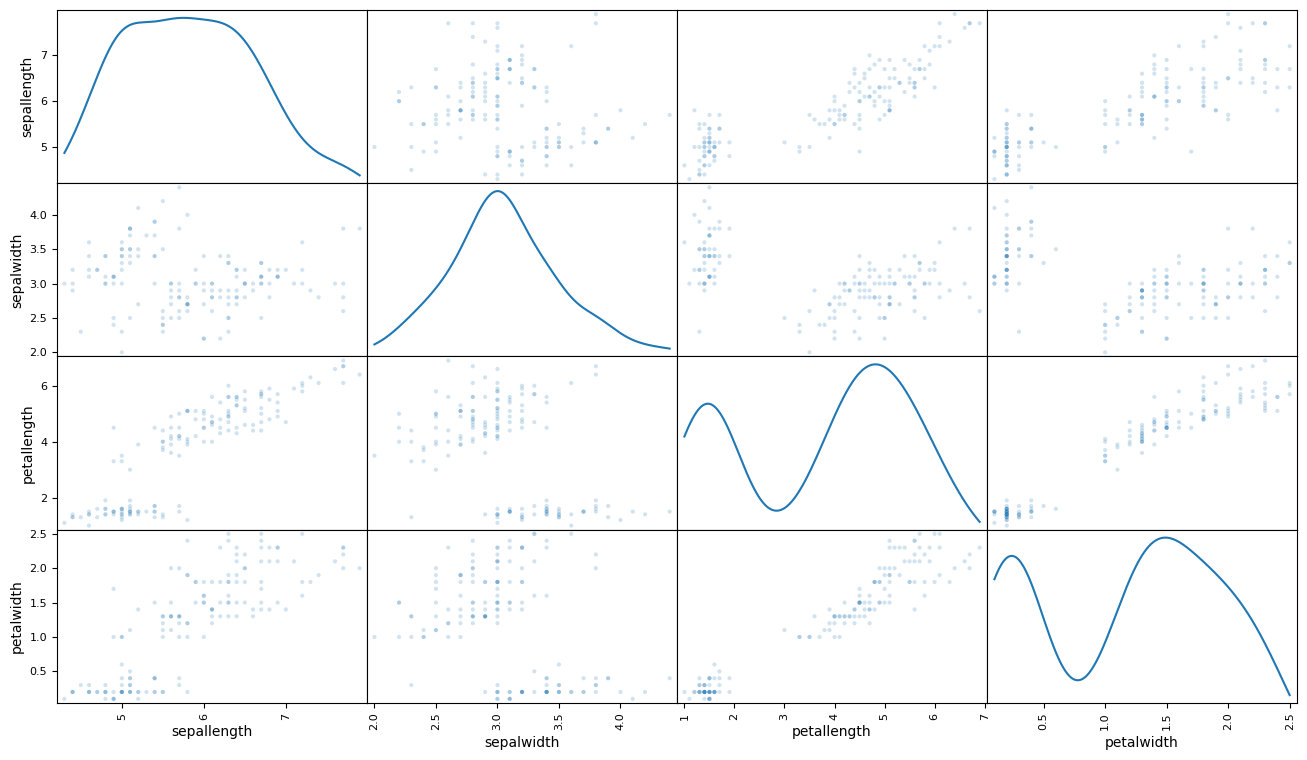

In [ ]:
# Task 1.4.4
from pandas.plotting import scatter_matrix

scatter_matrix(iris_df, alpha=0.2, figsize=(16, 9), diagonal='kde');

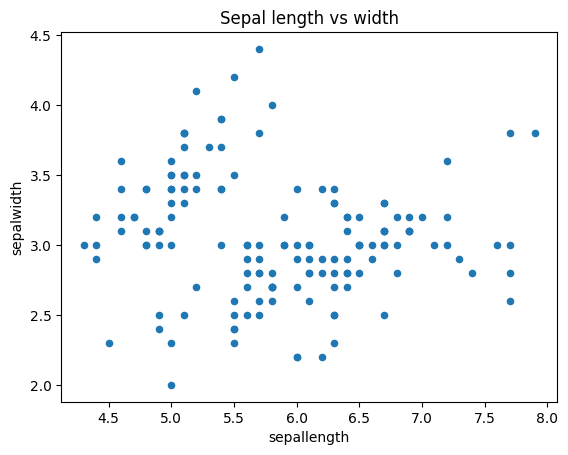

In [24]:
# Task 1.4.5 - a simple scatter plot for sepal length vs sepal width
iris_df.plot(kind='scatter', x='sepallength', y='sepalwidth', title='Sepal length vs width');

<Figure size 640x480 with 0 Axes>

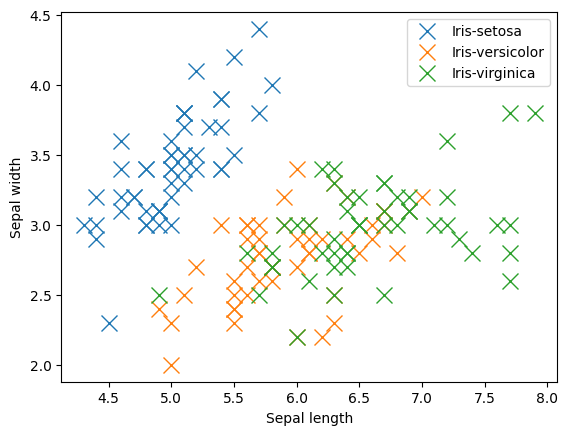

In [25]:
# Task 1.4.6 - a colour coded scatter plot according to class (also for for sepal length vs sepal width)
fig = plt.figure();
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

# group the data instances according to the different classes they belong to
groups = iris_df.groupby('class')

# iterate over each group and plot (scatter)
for name, group in groups:
    ax.plot(group.sepallength, group.sepalwidth, marker='x', linestyle='', ms=12, label=name)

# set labels for the y and x axes
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')

# add legend to the figure
ax.legend()

## Noise

Text(0, 0.5, 'Cm')

<Figure size 640x480 with 0 Axes>

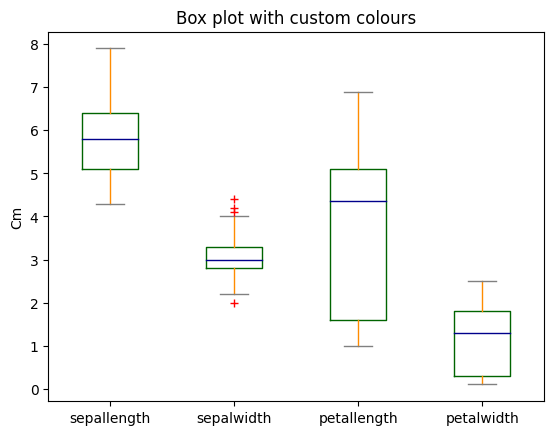

In [26]:
# Box plot in matplotlib/pandas
plt.figure();

# setting up custom colouring
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

# a box plot for all features
box_plot = iris_df.plot.box(color=color, sym='r+');
box_plot.set_title('Box plot with custom colours')
box_plot.set_ylabel('Cm')

<Axes: >

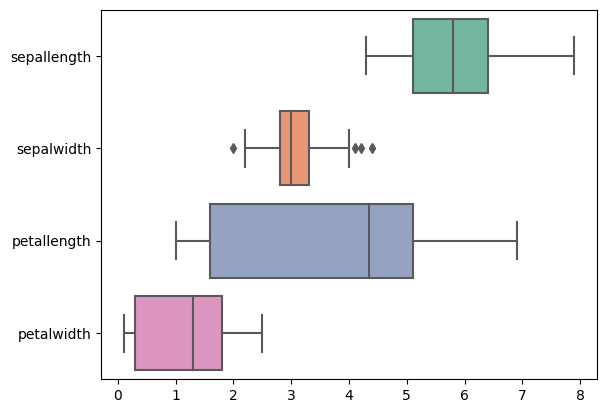

In [28]:
# and... using Seborn
import seaborn as sns
#sns.lmplot(data=iris_df, x="sepallength", y="sepalwidth", hue='class')
#sns.pairplot(data=iris_df, hue="class")

sns.boxplot(data=iris_df, orient="h", palette="Set2")


## Correlation Analysis

In [ ]:
# Calculate correlation coefficient sepal length and sepal width


# Task 1.6.1 - use Spearman to calculate the correlation coefficient too


In [ ]:
# Compute pairwise correlation of all features


In [ ]:
# Question 1.6.2 - which features have the strongest correlation?


In [ ]:
# Correlation matrix - Seaborn heatmap


In [ ]:
# Correlation matrix - customisations


In [ ]:
# Correlation matrix - https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec


## 2.1 Loading the IMDB Movies Dataset

In [ ]:
# imdb_df = ...

## Duplicates

In [ ]:
# Get a Pandas Series (vector) indicating TRUE for rows that are a duplicate


In [ ]:
# Counting the True/False entries - should show 3 duplicates (True)


In [ ]:
# Get the actual rows that are duplicates


In [ ]:
# Removing the duplicate rows


## Missing Values

In [ ]:
# Get DataFrame indicating True/False for whether values are missing or not


In [ ]:
# Get the number of missing entries per feature (column)


In [ ]:
# Dropping all rows with missing values


In [ ]:
# Imputing missing values, using the mean
